<a href="https://colab.research.google.com/github/bavcb/association-rule/blob/main/Test_Association_Rule_M02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**analysis_products : data update 8/8/2024**

# Import Package Library

In [1]:
!pip install mysql-connector-python # sql
!pip install mlxtend # association rule --> apriori
!pip install googletrans==4.0.0-rc1 # translate
#!pip install apyori

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=fbe7f0793fa00ae17e422c4ab07734b999a29aa3088f4141ac665edf3da02a36
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4bec

In [2]:
import pandas as pd # ใช้ทำงานกับตาราง
import numpy as np # ใช้ทำงานกับข้อมูลที่เป็น array
import matplotlib.pyplot as plt # plot graph
import mysql.connector # connect sql
from mlxtend.frequent_patterns import apriori # create association rules
from mlxtend.frequent_patterns import association_rules # create association rules
from mlxtend.preprocessing import TransactionEncoder # create transaction
import itertools # ลดการทำงานที่ซับซ้อนของลูป
from googletrans import Translator # translate
#from apyori import apriori

# Import Data

In [3]:
# Establish the connection
conn = mysql.connector.connect(
    host='159.138.255.180',
    user='root',
    password='Vcb168899@',
    database='vcb_ba'
)

# Create a cursor object
cursor = conn.cursor()

# Define SQL query
query = "SELECT * FROM analysis_products"

# Execute the query and fetch data # ระยะเวลาในการดึงข้อมูลนั้นขึ้นอยู่กับขนาดของข้อมูล ยิ่งมีขนาดใหญ่ยิ่งใช้เวลานาน
cursor.execute(query)
rows = cursor.fetchall()

# Get column names
column_names = [desc[0] for desc in cursor.description]


# read sql
#df = pd.read_sql(query,conn)
file = pd.DataFrame(rows,columns=column_names)
# Close the cursor and connection
cursor.close()
conn.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# change sql to csv # ไฟล์ csv จะถูกเก็บไว้ใน Folder ของไฟล์งานที่ทำอยู่
file.to_csv('data_file.csv', index=False)
# read csv file
df = pd.read_csv('data_file.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# แสดงข้อมูล
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,purchases_id,cars_id,baskets_id,purchase_create,transferred_date,chanal_purchase,th_code,level_num,gender,...,cat_sub1,cat_sub1_name,cat_sub2,cat_sub2_name,product_quantity,product_price,total_amount,country_num,country_name,ck
0,4129178,2248805,2337512,196678524095069,2021-12-27 10:13:01,2022-01-02 12:21:17,1688,TH403375,3,0,...,127372010.0,大码女装,1046799.0,大码连衣裙,1.0,43.06,43.06,1,THAILAND,0
1,4129179,2249918,2338921,196678524101901,2021-12-28 15:01:56,2022-01-02 12:21:18,1688,TH174119,4,0,...,1033273.0,布线产品,1033954.0,线卡、线扣,200.0,0.55,110.00,1,THAILAND,0
2,4129180,2249918,2338921,196678524101902,2021-12-28 15:01:56,2022-01-02 12:21:18,1688,TH174119,4,0,...,NaN,NaN,NaN,NaN,100.0,0.80,80.00,1,THAILAND,0
3,4129181,2249918,2338921,196678524101903,2021-12-28 15:01:56,2022-01-02 12:21:18,1688,TH174119,4,0,...,NaN,NaN,NaN,NaN,50.0,2.60,130.00,1,THAILAND,0
4,4129182,2249918,2338921,196678524101904,2021-12-28 15:01:56,2022-01-02 12:21:18,1688,TH174119,4,0,...,NaN,NaN,NaN,NaN,200.0,3.80,760.00,1,THAILAND,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020767,6149945,2816071,3081323,196678528089285,2024-08-07 23:00:02,2024-08-08 12:49:38,1688,TH313880,1,0,...,NaN,NaN,NaN,NaN,2500.0,0.43,1075.00,1,THAILAND,0
2020768,6149946,2816071,3081323,196678528089286,2024-08-07 23:00:02,2024-08-08 12:49:38,1688,TH313880,1,0,...,NaN,NaN,NaN,NaN,2500.0,0.53,1325.00,1,THAILAND,0
2020769,6149947,2816072,3081320,196678528123715,2024-08-07 23:00:10,2024-08-08 15:10:33,1688,TH313880,1,0,...,123924007.0,剪刀,1035507.0,其他剪刀,100.0,9.00,900.00,1,THAILAND,0
2020770,6149948,2816074,3083062,196678528135432,2024-08-08 00:34:28,2024-08-08 09:33:55,TAOBAO,TH398422,1,0,...,NaN,NaN,NaN,NaN,1.0,44.98,59.00,1,THAILAND,0


In [6]:
df.shape # จำนวนข้อมูลทั้งหมด

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2020772, 30)

# Clean Data

In [7]:
# ตัดคอลัมน์ที่ไม่ได้ใช้ทิ้ง
data = df[['id','purchases_id','cars_id','baskets_id','transferred_date','th_code','chanal_purchase','po','so','chanal_bill','product_link','product_name','cat_main','cat_main_name','cat_sub1','cat_sub1_name','cat_sub2','cat_sub2_name','product_quantity','product_price','total_amount']]
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,purchases_id,cars_id,baskets_id,transferred_date,th_code,chanal_purchase,po,so,chanal_bill,...,product_name,cat_main,cat_main_name,cat_sub1,cat_sub1_name,cat_sub2,cat_sub2_name,product_quantity,product_price,total_amount
0,4129178,2248805,2337512,196678524095069,2022-01-02 12:21:17,TH403375,1688,21122700096,XLY211226100380,1,...,大码连衣裙,10166.0,女装,127372010.0,大码女装,1046799.0,大码连衣裙,1.0,43.06,43.06
1,4129179,2249918,2338921,196678524101901,2022-01-02 12:21:18,TH174119,1688,21122800487,XHY211228100359,1,...,线卡、线扣,57.0,电子元器件,1033273.0,布线产品,1033954.0,线卡、线扣,200.0,0.55,110.00
2,4129180,2249918,2338921,196678524101902,2022-01-02 12:21:18,TH174119,1688,21122800487,XHY211228100359,1,...,其他插座,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.80,80.00
3,4129181,2249918,2338921,196678524101903,2022-01-02 12:21:18,TH174119,1688,21122800487,XHY211228100359,1,...,其他插座,NaN,NaN,NaN,NaN,NaN,NaN,50.0,2.60,130.00
4,4129182,2249918,2338921,196678524101904,2022-01-02 12:21:18,TH174119,1688,21122800487,XHY211228100359,1,...,船型开关,NaN,NaN,NaN,NaN,NaN,NaN,200.0,3.80,760.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020767,6149945,2816071,3081323,196678528089285,2024-08-08 12:49:38,TH313880,1688,24080700634,XHY240805100117,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500.0,0.43,1075.00
2020768,6149946,2816071,3081323,196678528089286,2024-08-08 12:49:38,TH313880,1688,24080700634,XHY240805100117,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2500.0,0.53,1325.00
2020769,6149947,2816072,3081320,196678528123715,2024-08-08 15:10:33,TH313880,1688,24080700635,XHY240805100114,1,...,NaN,59.0,五金、工具,123924007.0,剪刀,1035507.0,其他剪刀,100.0,9.00,900.00
2020770,6149948,2816074,3083062,196678528135432,2024-08-08 09:33:55,TH398422,TAOBAO,24080800001,XLY240806100836,1,...,kumikumiหวานลบอายุกดพับขัดแตะบินบินแขนเสื้อเสื...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,44.98,59.00


In [8]:
data.isnull().any() # True = NaN

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
id,False
purchases_id,False
cars_id,False
baskets_id,False
transferred_date,False
th_code,False
chanal_purchase,True
po,False
so,True
chanal_bill,False


In [9]:
# ลบค่าเฉพาะตาราง ['cat_sub1_name']
data_drop = data.dropna(subset=['cat_sub1_name'])
data_drop

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,purchases_id,cars_id,baskets_id,transferred_date,th_code,chanal_purchase,po,so,chanal_bill,...,product_name,cat_main,cat_main_name,cat_sub1,cat_sub1_name,cat_sub2,cat_sub2_name,product_quantity,product_price,total_amount
0,4129178,2248805,2337512,196678524095069,2022-01-02 12:21:17,TH403375,1688,21122700096,XLY211226100380,1,...,大码连衣裙,10166.0,女装,127372010.0,大码女装,1046799.0,大码连衣裙,1.0,43.06,43.06
1,4129179,2249918,2338921,196678524101901,2022-01-02 12:21:18,TH174119,1688,21122800487,XHY211228100359,1,...,线卡、线扣,57.0,电子元器件,1033273.0,布线产品,1033954.0,线卡、线扣,200.0,0.55,110.00
6,4129184,2250644,2340008,196678524106956,2022-01-02 12:19:20,TH100168,1688,21122900508,XLY211229100501,1,...,餐椅,13.0,家装、建材,123610020.0,餐厅家具,121486003.0,餐椅,12.0,53.44,641.28
7,4129185,2250661,2339780,196678524105638,2022-01-02 12:19:21,TH059370,1688,21122900525,XLY211229100273,1,...,冰袋、冰包、野餐包,15.0,日用百货,10287.0,餐具,1031741.0,冰袋、冰包、野餐包,2.0,50.00,100.00
8,4129186,2250661,2339780,196678524105639,2022-01-02 12:19:21,TH059370,1688,21122900525,XLY211229100273,1,...,冰袋、冰包、野餐包,15.0,日用百货,10287.0,餐具,1031741.0,冰袋、冰包、野餐包,1.0,50.00,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020671,6149849,2816036,3082463,196678528134311,2024-08-08 15:10:36,TH365471,1688,24080700599,XHY240806100237,1,...,NaN,55.0,橡塑,1031654.0,工业用橡胶制品,0.0,NaN,200.0,14.00,2800.00
2020682,6149860,2816049,3082422,196678528023446,2024-08-08 12:57:29,TH365471,1688,24080700612,XHY240806100196,1,...,NaN,10208.0,仪器仪表,1033816.0,工业计时器,0.0,NaN,200.0,10.50,2100.00
2020683,6149861,2816049,3082422,196678528023447,2024-08-08 12:57:29,TH365471,1688,24080700612,XHY240806100196,1,...,NaN,10208.0,仪器仪表,1033816.0,工业计时器,0.0,NaN,200.0,10.50,2100.00
2020685,6149863,2816051,3081970,196678527735731,2024-08-08 12:49:41,TH365471,1688,24080700614,XHY240805100764,1,...,NaN,59.0,五金、工具,124194006.0,液压工具,1036783.0,其他液压工具,6.0,145.00,870.00


*ถ้าลบค่าว่างทั้งหมดจำนวนข้อมูลจะเหลือ 880,845 rows จึงจะลบแค่เฉพาะคอลัมน์ cat_sub1_name ซึ่งจะเหลือ 1,116,605 rows เพื่อจะให้เห็นถึง association rules มากที่สุด*

In [10]:
data_drop.shape # จำนวนข้อมูลหลังลบค่าว่างทิ้ง

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1116605, 21)

In [11]:
data_drop[data_drop['product_quantity'] ==0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,purchases_id,cars_id,baskets_id,transferred_date,th_code,chanal_purchase,po,so,chanal_bill,...,product_name,cat_main,cat_main_name,cat_sub1,cat_sub1_name,cat_sub2,cat_sub2_name,product_quantity,product_price,total_amount
60,4129238,2251102,2340140,196678524107617,2022-01-02 12:19:56,TH13430,1688,21123000327,XHY211229100633,1,...,仿真绿植,67.0,办公、文教,201162103.0,仿真园艺,1038172.0,仿真植物,0.0,3.95,0.0
78,4129256,2251102,2340140,196678524107635,2022-01-02 12:19:56,TH13430,1688,21123000327,XHY211229100633,1,...,仿真绿植,67.0,办公、文教,201162103.0,仿真园艺,1038172.0,仿真植物,0.0,5.50,0.0
485,4129663,2251536,2342259,196678524117562,2022-01-03 16:40:28,TH544422,1688,22010300132,XLY220103100128,1,...,小学书包,1042954.0,箱包皮具,126128002.0,儿童包,1031750.0,小学书包,0.0,112.00,0.0
566,4129744,2251555,2340876,196678524110681,2022-01-03 14:48:47,TH631771,1688,22010300151,LY211230100573,2,...,休闲裤,10166.0,女装,125748001.0,女式休闲裤,1031871.0,休闲裤,0.0,15.99,0.0
727,4129905,2251611,2341115,196678524111837,2022-01-03 14:48:49,TH041271,1688,22010300207,XLY211231100175,2,...,办公用胶带,67.0,办公、文教,2113.0,装订、胶粘、桌面用品,124746005.0,办公用胶带,0.0,2.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012131,6141309,2813844,3078102,196678527871329,2024-08-03 14:56:54,TH416487,1688,24080300173,XLY240731100743,1,...,NaN,127380009.0,运动服饰,121898001.0,运动户外辅助用品,1048301.0,运动帽、头巾,0.0,7.50,0.0
2012134,6141312,2813844,3078102,196678527871332,2024-08-03 14:56:54,TH416487,1688,24080300173,XLY240731100743,1,...,NaN,127380009.0,运动服饰,121898001.0,运动户外辅助用品,1048301.0,运动帽、头巾,0.0,7.50,0.0
2012137,6141315,2813844,3078102,196678527871335,2024-08-03 14:56:54,TH416487,1688,24080300173,XLY240731100743,1,...,NaN,127380009.0,运动服饰,121898001.0,运动户外辅助用品,1048301.0,运动帽、头巾,0.0,7.50,0.0
2012142,6141320,2813844,3078102,196678527871340,2024-08-03 14:56:54,TH416487,1688,24080300173,XLY240731100743,1,...,NaN,127380009.0,运动服饰,121898001.0,运动户外辅助用品,1048301.0,运动帽、头巾,0.0,7.50,0.0


In [12]:
data_drop[data_drop['total_amount'] ==0]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,purchases_id,cars_id,baskets_id,transferred_date,th_code,chanal_purchase,po,so,chanal_bill,...,product_name,cat_main,cat_main_name,cat_sub1,cat_sub1_name,cat_sub2,cat_sub2_name,product_quantity,product_price,total_amount
60,4129238,2251102,2340140,196678524107617,2022-01-02 12:19:56,TH13430,1688,21123000327,XHY211229100633,1,...,仿真绿植,67.0,办公、文教,201162103.0,仿真园艺,1038172.0,仿真植物,0.0,3.95,0.0
78,4129256,2251102,2340140,196678524107635,2022-01-02 12:19:56,TH13430,1688,21123000327,XHY211229100633,1,...,仿真绿植,67.0,办公、文教,201162103.0,仿真园艺,1038172.0,仿真植物,0.0,5.50,0.0
485,4129663,2251536,2342259,196678524117562,2022-01-03 16:40:28,TH544422,1688,22010300132,XLY220103100128,1,...,小学书包,1042954.0,箱包皮具,126128002.0,儿童包,1031750.0,小学书包,0.0,112.00,0.0
566,4129744,2251555,2340876,196678524110681,2022-01-03 14:48:47,TH631771,1688,22010300151,LY211230100573,2,...,休闲裤,10166.0,女装,125748001.0,女式休闲裤,1031871.0,休闲裤,0.0,15.99,0.0
727,4129905,2251611,2341115,196678524111837,2022-01-03 14:48:49,TH041271,1688,22010300207,XLY211231100175,2,...,办公用胶带,67.0,办公、文教,2113.0,装订、胶粘、桌面用品,124746005.0,办公用胶带,0.0,2.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012131,6141309,2813844,3078102,196678527871329,2024-08-03 14:56:54,TH416487,1688,24080300173,XLY240731100743,1,...,NaN,127380009.0,运动服饰,121898001.0,运动户外辅助用品,1048301.0,运动帽、头巾,0.0,7.50,0.0
2012134,6141312,2813844,3078102,196678527871332,2024-08-03 14:56:54,TH416487,1688,24080300173,XLY240731100743,1,...,NaN,127380009.0,运动服饰,121898001.0,运动户外辅助用品,1048301.0,运动帽、头巾,0.0,7.50,0.0
2012137,6141315,2813844,3078102,196678527871335,2024-08-03 14:56:54,TH416487,1688,24080300173,XLY240731100743,1,...,NaN,127380009.0,运动服饰,121898001.0,运动户外辅助用品,1048301.0,运动帽、头巾,0.0,7.50,0.0
2012142,6141320,2813844,3078102,196678527871340,2024-08-03 14:56:54,TH416487,1688,24080300173,XLY240731100743,1,...,NaN,127380009.0,运动服饰,121898001.0,运动户外辅助用品,1048301.0,运动帽、头巾,0.0,7.50,0.0


In [13]:
# เอา product_quantity & total_amount ที่มีค่าเป็น 0 ออก
dataset = data_drop[(data_drop.product_quantity > 0) & (data_drop.total_amount >0)]
dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,purchases_id,cars_id,baskets_id,transferred_date,th_code,chanal_purchase,po,so,chanal_bill,...,product_name,cat_main,cat_main_name,cat_sub1,cat_sub1_name,cat_sub2,cat_sub2_name,product_quantity,product_price,total_amount
0,4129178,2248805,2337512,196678524095069,2022-01-02 12:21:17,TH403375,1688,21122700096,XLY211226100380,1,...,大码连衣裙,10166.0,女装,127372010.0,大码女装,1046799.0,大码连衣裙,1.0,43.06,43.06
1,4129179,2249918,2338921,196678524101901,2022-01-02 12:21:18,TH174119,1688,21122800487,XHY211228100359,1,...,线卡、线扣,57.0,电子元器件,1033273.0,布线产品,1033954.0,线卡、线扣,200.0,0.55,110.00
6,4129184,2250644,2340008,196678524106956,2022-01-02 12:19:20,TH100168,1688,21122900508,XLY211229100501,1,...,餐椅,13.0,家装、建材,123610020.0,餐厅家具,121486003.0,餐椅,12.0,53.44,641.28
7,4129185,2250661,2339780,196678524105638,2022-01-02 12:19:21,TH059370,1688,21122900525,XLY211229100273,1,...,冰袋、冰包、野餐包,15.0,日用百货,10287.0,餐具,1031741.0,冰袋、冰包、野餐包,2.0,50.00,100.00
8,4129186,2250661,2339780,196678524105639,2022-01-02 12:19:21,TH059370,1688,21122900525,XLY211229100273,1,...,冰袋、冰包、野餐包,15.0,日用百货,10287.0,餐具,1031741.0,冰袋、冰包、野餐包,1.0,50.00,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020671,6149849,2816036,3082463,196678528134311,2024-08-08 15:10:36,TH365471,1688,24080700599,XHY240806100237,1,...,NaN,55.0,橡塑,1031654.0,工业用橡胶制品,0.0,NaN,200.0,14.00,2800.00
2020682,6149860,2816049,3082422,196678528023446,2024-08-08 12:57:29,TH365471,1688,24080700612,XHY240806100196,1,...,NaN,10208.0,仪器仪表,1033816.0,工业计时器,0.0,NaN,200.0,10.50,2100.00
2020683,6149861,2816049,3082422,196678528023447,2024-08-08 12:57:29,TH365471,1688,24080700612,XHY240806100196,1,...,NaN,10208.0,仪器仪表,1033816.0,工业计时器,0.0,NaN,200.0,10.50,2100.00
2020685,6149863,2816051,3081970,196678527735731,2024-08-08 12:49:41,TH365471,1688,24080700614,XHY240805100764,1,...,NaN,59.0,五金、工具,124194006.0,液压工具,1036783.0,其他液压工具,6.0,145.00,870.00


## แปลภาษาจีน ---> อังกฤษ

In [14]:
translator = Translator() # สร้างตัวแปลเปล่าในการแปลภาษา

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/httpx/_config.py:156: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated
  context = ssl.SSLContext(ssl.PROTOCOL_TLS)
/usr/local/lib/python3.10/dist-packages/httpx/_config.py:159: DeprecationWarning: ssl.OP_NO_SSL*/ssl.OP_NO_TLS* options are deprecated
  context.options |= ssl.OP_NO_TLSv1
/usr/local/lib/python3.10/dist-packages/httpx/_config.py:160: DeprecationWarning: ssl.OP_NO_SSL*/ssl.OP_NO_TLS* options are deprecated
  context.options |= ssl.OP_NO_TLSv1_1


In [15]:
# ฟังก์ชันในการแปลข้อความ
def translate_text(text, src_lang='auto', dest_lang='en'): # src_lang คือ ภาษาต้นทางที่ต้องการแปล, dest_lang ภาษาปลายทางที่จะแปล
    try:
        return translator.translate(text, src=src_lang, dest=dest_lang).text
    except Exception as e:
        return text  # ถ้าแปลไม่ได้ให้คืนค่าเดิม

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# ใช้ cache ในการช่วยลดระยะเวลาในการแปลข้อความ โดยถ้าเจอข้อความซ้ำกันกับที่แปลไปแล้วให้ดึงคำแปลนั้นมาใช้แทนการแปลภาษา
translation_cache = {}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# ฟังก์ชันคำสั่งให้คำสั่งข้างบนทำการแปลโดยใช้ cache ซึ่งถ้าแปลไม่ได้ให้รีเทิร์นค่าเดิมกลับมา
def translate_text_with_cache(text, dest_lang='en'):
    if text in translation_cache:
        return translation_cache[text]
    else:
        translated = translate_text(text, dest_lang=dest_lang)
        translation_cache[text] = translated
        return translated

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# สั่งให้ฟังก์ชันการแปลภาษาทำงานโดยให้แปลคอลัมน์ cat_sub1_name และสร้างเก็บค่าการแปลที่คอลัมน์ใหม่ คือ cat_sub1_name_en
dataset['cat_sub1_name_en'] = dataset['cat_sub1_name'].apply(lambda x: translate_text_with_cache(x, dest_lang='en'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-b257819689db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cat_sub1_name_en'] = dataset['cat_sub1_name'].apply(lambda x: translate_text_with_cache(x, dest_lang='en')) # สั่งให้ฟังก์ชันการแปลภาษาทำงานโดยให้แปลคอลัมน์ cat_sub1_name และสร้างเก็บค่าการแปลที่คอลัมน์ใหม่ คือ cat_sub1_name_en


In [19]:
#dataset['cat_sub1_name_en'] = dataset['cat_sub1_name'].apply(lambda x: translate_text(x, dest_lang='en')) # คำสั่งนี้จะแปลใหม่ทุก rows ซึ่งใช้เวลานานเกินไป

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# ใช้เพื่อให้ตารางแสดงคอลัมน์ ['cat_sub1_name_en'] รวมกับตาราง dataset เดิม
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,purchases_id,cars_id,baskets_id,transferred_date,th_code,chanal_purchase,po,so,chanal_bill,product_link,product_name,cat_main,cat_main_name,cat_sub1,cat_sub1_name,cat_sub2,cat_sub2_name,product_quantity,product_price,total_amount,cat_sub1_name_en
0,4129178,2248805,2337512,196678524095069,2022-01-02 12:21:17,TH403375,1688,21122700096,XLY211226100380,1,https://detail.1688.com/offer/651330149311.html,大码连衣裙,10166.0,女装,127372010.0,大码女装,1046799.0,大码连衣裙,1.0,43.06,43.06,Large size women's clothing
1,4129179,2249918,2338921,196678524101901,2022-01-02 12:21:18,TH174119,1688,21122800487,XHY211228100359,1,https://detail.1688.com/offer/555962625187.html,线卡、线扣,57.0,电子元器件,1033273.0,布线产品,1033954.0,线卡、线扣,200.0,0.55,110.00,Wiring product
6,4129184,2250644,2340008,196678524106956,2022-01-02 12:19:20,TH100168,1688,21122900508,XLY211229100501,1,https://detail.1688.com/offer/658662964846.html,餐椅,13.0,家装、建材,123610020.0,餐厅家具,121486003.0,餐椅,12.0,53.44,641.28,Restaurant furniture
7,4129185,2250661,2339780,196678524105638,2022-01-02 12:19:21,TH059370,1688,21122900525,XLY211229100273,1,https://detail.1688.com/offer/1295274089.html,冰袋、冰包、野餐包,15.0,日用百货,10287.0,餐具,1031741.0,冰袋、冰包、野餐包,2.0,50.00,100.00,tableware
8,4129186,2250661,2339780,196678524105639,2022-01-02 12:19:21,TH059370,1688,21122900525,XLY211229100273,1,https://detail.1688.com/offer/1295274089.html,冰袋、冰包、野餐包,15.0,日用百货,10287.0,餐具,1031741.0,冰袋、冰包、野餐包,1.0,50.00,50.00,tableware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020671,6149849,2816036,3082463,196678528134311,2024-08-08 15:10:36,TH365471,1688,24080700599,XHY240806100237,1,https://detail.1688.com/offer/564571594343.html,NaN,55.0,橡塑,1031654.0,工业用橡胶制品,0.0,NaN,200.0,14.00,2800.00,Industrial rubber products
2020682,6149860,2816049,3082422,196678528023446,2024-08-08 12:57:29,TH365471,1688,24080700612,XHY240806100196,1,https://detail.1688.com/offer/574076029717.html,NaN,10208.0,仪器仪表,1033816.0,工业计时器,0.0,NaN,200.0,10.50,2100.00,Industrial timer
2020683,6149861,2816049,3082422,196678528023447,2024-08-08 12:57:29,TH365471,1688,24080700612,XHY240806100196,1,https://detail.1688.com/offer/573932012067.html,NaN,10208.0,仪器仪表,1033816.0,工业计时器,0.0,NaN,200.0,10.50,2100.00,Industrial timer
2020685,6149863,2816051,3081970,196678527735731,2024-08-08 12:49:41,TH365471,1688,24080700614,XHY240805100764,1,https://detail.1688.com/offer/644257273431.html,NaN,59.0,五金、工具,124194006.0,液压工具,1036783.0,其他液压工具,6.0,145.00,870.00,Hydraulic tool


# Data Preprocessing

**คอลัมน์ที่นำมาใช้งาน**

  *purchase_id == รหัสคำสั่งซื้อ*

  *cat_sub1_name == หมวดสินค้าย่อยที่1*

  *th_code == รหัสลูกค้า*

In [22]:
# ใน 1 การสั่งซื้อลูกค้าซื้อสินค้าไปจำนวนกี่รายการ
purchase = dataset.groupby('purchases_id').count().sort_values(by=['cat_sub1_name_en'],ascending=False)
purchase.iloc[:,-1:].reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,purchases_id,cat_sub1_name_en
0,2691827,144
1,2691925,135
2,2741069,88
3,2691969,84
4,2691842,81
...,...,...
209310,2251378,1
209311,2251383,1
209312,2810556,1
209313,2810688,1


In [23]:
# ใน 1 การสั่งซื้อลูกค้าซื้อสินค้าไปจำนวนกี่รายการ โดยที่สินค้าไม่ซ้ำ
product_purchase = dataset.groupby('purchases_id')['cat_sub1_name_en'].nunique().sort_values(ascending=False)
product_purchase.reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,purchases_id,cat_sub1_name_en
0,2437869,20
1,2438748,18
2,2426847,17
3,2262953,12
4,2438512,12
...,...,...
209310,2433195,1
209311,2433197,1
209312,2433198,1
209313,2433201,1


In [24]:
# ลูกค้า 1 คนสั่งซื้อสินค้าไปกี่รายงาน
th_code = dataset.groupby('th_code').count().sort_values(by=['cat_sub1_name_en'],ascending=False)
th_code.iloc[:,-1:].reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,th_code,cat_sub1_name_en
0,TH509912,15559
1,TH110296,11236
2,TH124928,9902
3,TH306141,9662
4,TH328224,8940
...,...,...
12649,TH966551,1
12650,TH966679,1
12651,TH966768,1
12652,TH967271,1


In [25]:
#  ลูกค้า 1 คนสั่งซื้อสินค้าไปกี่รายงาน โดยที่สินค้าไม่ซ้ำ
th_code_purchase = dataset.groupby('th_code')['cat_sub1_name_en'].nunique().sort_values(ascending=False)
th_code_purchase.reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,th_code,cat_sub1_name_en
0,TH00666,149
1,TH365471,141
2,TH114023,127
3,TH652464,112
4,TH069347,109
...,...,...
12649,TH02647,1
12650,TH018186,1
12651,TH01853,1
12652,TH02116,1


In [26]:
# ลูกค้า 1 คนสั่งซื้อสินค้าไปกี่รายงาน
products = dataset.groupby('cat_sub1_name_en').count().sort_values(by=['purchases_id'],ascending=False)
products = products.iloc[:,1:2].reset_index()
products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cat_sub1_name_en,purchases_id
0,Jewelry,29583
1,"Hair accessories, headdress",27477
2,Women's shoes,26921
3,Handle,25055
4,Children's suit,24962
...,...,...
833,Electrician and electrical products processing,1
834,Telephone with attachment,1
835,Intelligent traffic,1
836,Ink,1


## Transaction

In [27]:
# สร้าง transaction ที่บ่งบอกว่าลูกค้าแต่ละคนได้ซื้อสินค้าใดไปบ้าง เพื่อหาพฤติกรรมการซื้อสินค้าร่วมกันของลูกค้า
transaction = dataset.groupby('th_code')['cat_sub1_name_en'].apply(lambda x: list(set(x))).reset_index()
transaction

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,th_code,cat_sub1_name_en
0,TH000036,[Garden]
1,TH000041,"[Learning stationery, Paper, Biscuits, Electri..."
2,TH001489,[Special lighting]
3,TH00469,"[Jewelry box, bag, bag, box, Female jeans, Wom..."
4,TH00577,[Living appliance]
...,...,...
12649,TH979509,[Kitchen tool]
12650,TH979567,[Women's shoes]
12651,TH979942,"[Wind blocking, shading, rainproofing tools]"
12652,TH980538,"[Pajamas, home clothes, robes, bathrobes]"


In [28]:
#set_list = dataset.groupby(['purchases_id', 'product_name'])['product_name'].count().unstack().reset_index().fillna(0).set_index('purchases_id')
#set_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# ทำการแปลง transaction จากข้างบนให้เป็นเมตริก เพื่อแสดงการซื้อสินค้าแต่ละชนิดว่าใครซื้อบ้าง โดยถ้า True = ซื้อ, False = ไม่ซื้อ
# คอลัมน์แนวนอน คือ รายชื่อสินค้า คอลัมน์แนวตั้ง คือ th_code ซึ่งเรียงตาม transaction ที่แสดงข้างบน
transaction_list = transaction['cat_sub1_name_en'].tolist()
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
transaction_set = pd.DataFrame(te_ary, columns=te.columns_)
transaction_set

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3D printer  3D printing wire  Abrasion  \
0           False             False     False   
1           False             False     False   
2           False             False     False   
3           False             False     False   
4           False             False     False   
...           ...               ...       ...   
12649       False             False     False   
12650       False             False     False   
12651       False             False     False   
12652       False             False     False   
12653       False             False     False   

       Access control attendance equipment and system  \
0                                               False   
1                                               False   
2                                               False   
3                                               False   
4                                               False   
...                                               ...   
12649                                           False   
12650                                           False   
12651                                           False   
12652                                           False   
12653                                           False   

       Administrative supplies  Adsorbent  Advertising shirt  \
0                        False      False              False   
1                        False      False              False   
2                        False      False              False   
3                        False      False              False   
4                        False      False              False   
...                        ...        ...                ...   
12649                    False      False              False   
12650                    False      False              False   
12651                    False      False              False   
12652                    False      False              False   
12653                    False      False              False   

       Advertising, creative towel  Advertising, exhibition equipment  \
0                            False                              False   
1                            False                              False   
2                            False                              False   
3                            False                              False   
4                            False                              False   
...                            ...                                ...   
12649                        False                              False   
12650                        False                              False   
12651                        False                              False   
12652                        False                              False   
12653                        False                              False   

       Affairs of animal husbandry  Agricultural machinery  Agricultural tool  \
0                            False                   False              False   
1                            False                   False              False   
2                            False                   False              False   
3                            False                   False              False   
4                            False                   False              False   
...                            ...                     ...                ...   
12649                        False                   False              False   
12650                        False                   False              False   
12651                        False                   False              False   
12652                        False                   False              False   
12653                        False                   False              False   

       Agricultural utensil  Air purification equipment  Alarm  \
0                     False                     

In [30]:
transaction_set.isnull().any()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
3D printer,False
3D printing wire,False
Abrasion,False
Access control attendance equipment and system,False
Administrative supplies,False
...,...
tweezers,False
valve,False
vegetable,False
wallet,False


In [31]:
filter_test = dataset[dataset['cat_sub1_name_en'] == 'tableware']
filter_test.iloc[:,5:6].reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,th_code
0,7,TH059370
1,8,TH059370
2,450,TH035563
3,451,TH035563
4,1485,TH633952
...,...,...
6845,1921005,TH685866
6846,1933040,TH457366
6847,1947766,TH062263
6848,1947767,TH062263


In [32]:
test = filter_test.groupby('cat_sub1_name_en')['th_code'].apply(lambda x: ','.join(set(x))).reset_index() \
    .assign(th_code=lambda df: df['th_code'].str.split(',')) \
    .explode('th_code').reset_index(drop=True)
test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cat_sub1_name_en,th_code
0,tableware,TH583548
1,tableware,TH494140
2,tableware,TH846638
3,tableware,TH733440
4,tableware,TH167316
...,...,...
332,tableware,TH11581
333,tableware,TH403636
334,tableware,TH170088
335,tableware,TH826435


# Model

## ทำความเข้าใจความหมายเกี่ยวกับ Metric ที่ใช้ในการประกอบการตัดสินใจ

**Support** : ค่าที่บอกเปอร์เซ็นต์การจับคู่มากน้อยแค่ไหน

  ซึ่งเกิดมาจากการสัดส่วนการซื้อสินค้าหนึ่งอย่าง จากทั้งหมดที่มีการสั่งซื้อสินค้าเข้ามา ดังนั้นยิ่งมีค่า support มาก ยิ่งมีโอกาสที่ลูกค้าจะซื้อสินค้านั้นๆ

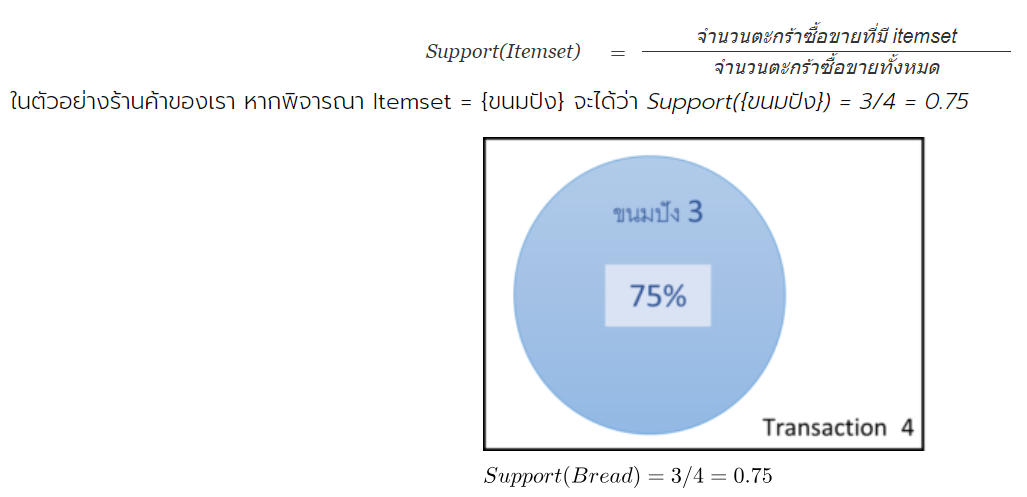

**Confidance** : ค่าที่บอกเปอร์เซ็นต์ความเชื่อมั่นของสินค้าคู่นั้นๆ ซึ่งหากมีค่าสูง แสดงว่ามีความเชื่อมั่นมากที่สินค้าคู่นั้นๆ จะถูกซื้อพร้อมกัน

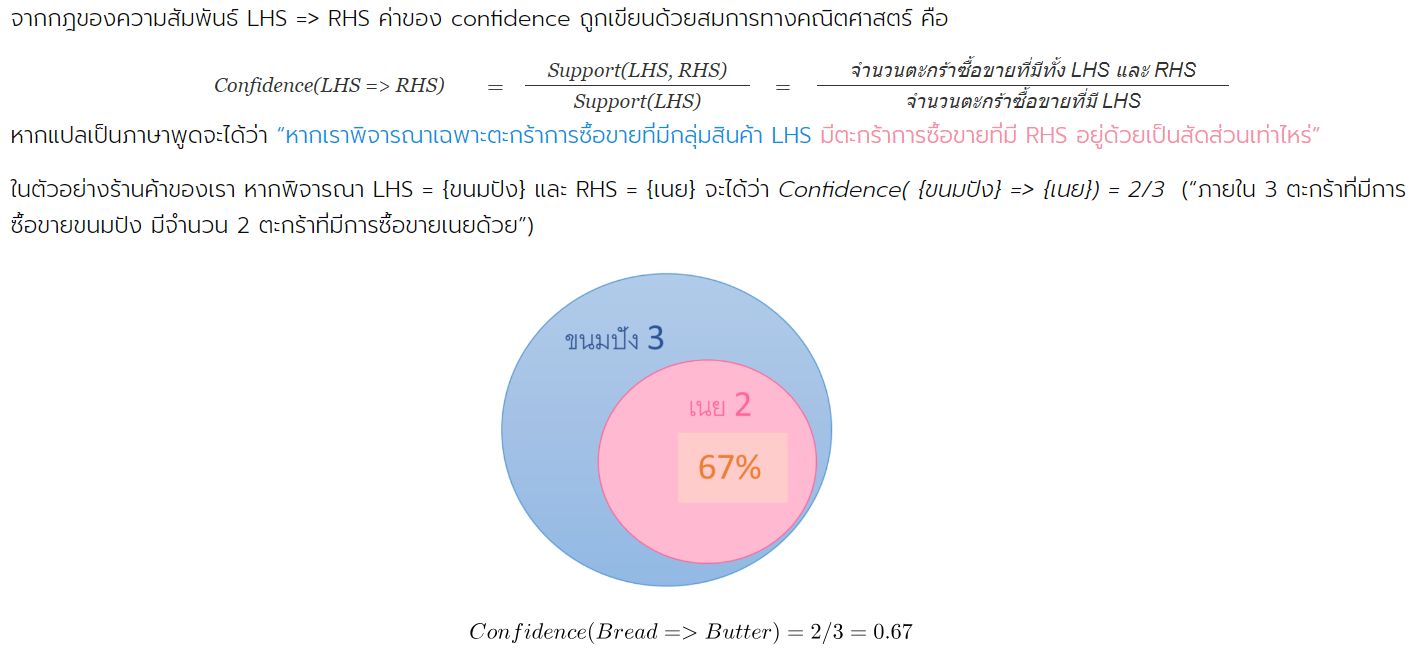

**Lift** : ค่าความน่าจะเป็นที่จะหยิบสินค้า B เมื่อหยิบสินค้า A ไปแล้ว

  ซึ่งถ้ายิ่งค่า Lift มากกว่า 1 แสดงว่ายิ่งมีความน่าจะเป็นที่สินค้า B จะถูกซื้อไปด้วย

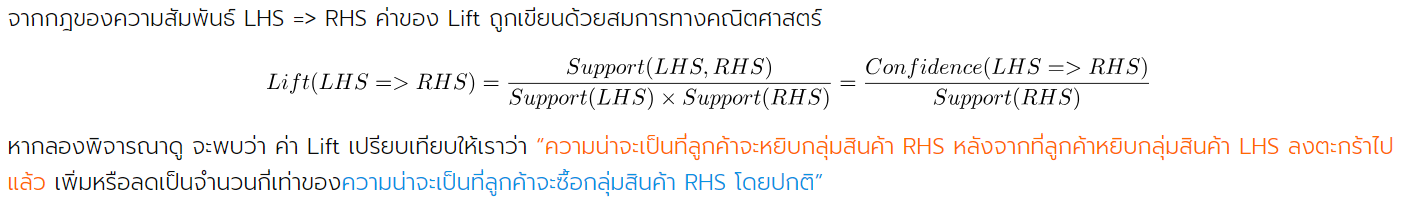

**เพิ่มเติม**

  เป็นอีก Metric หนึ่งที่ถูกนำมาใช้วัดค่าความสัมพันธ์เช่นเดียวกับ Support, Confidance และ Lift

**Laverage** : ค่าที่บ่งบอกถึงความแตกต่างระหว่างการเกิดร่วมกันของไอเทมเซ็ตที่เราสนใจ และการเกิดร่วมกันที่คาดว่าจะเกิดขึ้นหากไม่มีความสัมพันธ์ระหว่างกัน

Leverage มีค่าในช่วง [-1, 1]:

  * ค่าที่เป็นบวก: บ่งบอกว่า X และ Y มีแนวโน้มที่จะเกิดร่วมกันมากกว่าการเกิดแบบสุ่ม

  * ค่าที่เป็นลบ: บ่งบอกว่า X และ Y มีแนวโน้มที่จะไม่เกิดร่วมกัน

**Conviction** : ค่าที่ใช้วัดความเชื่อมั่นในการที่กฎความสัมพันธ์จะถูกต้อง ในกรณีที่ด้านขวาของกฎ (consequent) เกิดขึ้นบ่อยแค่ไหนเมื่อด้านซ้าย (antecedent) ของกฎเกิดขึ้น

**Zhangs Mectric** : การที่กฎสามารถบ่งบอกถึงการเกิดของ consequent ได้ดีเพียงใด โดยไม่ถูกอิทธิพลจากความถี่ของไอเทมใดไอเทมหนึ่ง

Zhang’s Metric จะมีค่าอยู่ในช่วง [-1, 1]:

  * ค่าเข้าใกล้ 1 แสดงถึงความสัมพันธ์เชิงบวกที่แข็งแกร่ง
  * ค่าเข้าใกล้ -1 แสดงถึงความสัมพันธ์เชิงลบที่แข็งแกร่ง
  * ค่าประมาณ 0 แสดงถึงความไม่มีความสัมพันธ์



## Code

In [33]:
frequent_itemsets = apriori(transaction_set,min_support = 0.01, use_colnames=True) # 0.01% ของรายการสินค้าทั้งหมดที่มีคนซื้อมากกว่า 1 %
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.011854,(Apple dedicated accessories)
1,0.011538,"(Art, calligraphy, drawing supplies)"
2,0.028370,"(Atmosphere, layout supplies)"
3,0.011775,(Baking)
4,0.016991,(Bathroom cleaning)
...,...,...
113,0.011617,"(Women's T -shirt, Women's casual pants)"
114,0.010985,"(Women's sweater, Women's T -shirt)"
115,0.011617,"(Women's T -shirt, dress)"
116,0.010511,"(Women's sweater, dress)"


In [34]:
#for result in frequent_itemsets:
  #print(result)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Craft),(Jewelry),0.042516,0.051683,0.012249,0.288104,5.574418,0.010052,1.332100,0.857047
1,(Jewelry),(Craft),0.051683,0.042516,0.012249,0.237003,5.574418,0.010052,1.254899,0.865332
2,(Fashion casual suit),(dress),0.020468,0.038486,0.012328,0.602317,15.650337,0.011540,2.417788,0.955664
3,(dress),(Fashion casual suit),0.038486,0.020468,0.012328,0.320329,15.650337,0.011540,1.441185,0.973572
4,"(Hair accessories, headdress)",(Jewelry),0.060929,0.051683,0.011459,0.188067,3.638846,0.008310,1.167975,0.772240
5,(Jewelry),"(Hair accessories, headdress)",0.051683,0.060929,0.011459,0.221713,3.638846,0.008310,1.206586,0.764710
6,(Item),(Handle),0.031769,0.037538,0.018492,0.582090,15.506866,0.017300,2.303035,0.966208
7,(Handle),(Item),0.037538,0.031769,0.018492,0.492632,15.506866,0.017300,1.908340,0.971999
8,(Jewelry),(Handle),0.051683,0.037538,0.012565,0.243119,6.476697,0.010625,1.271617,0.891686
9,(Handle),(Jewelry),0.037538,0.051683,0.012565,0.334737,6.476697,0.010625,1.425476,0.878580


**ถ้าลูกค้าซื้อ Women's sweater จะซื้อ dress ไปด้วยที่ค่า support = 1.1%, confidance = 30.9 %, lift = 8.4**

In [36]:
frequent_itemsets.to_csv('support_items.csv', index=False) # export frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
rules.to_csv('test_association_rule.csv', index=False) # export rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**-----------------------------------------------------------------------------------------------------------------------**

**จากจำนวนลูกค้าที่มีการซื้อสินค้าทั้งหมด 12,654 คน พบว่า**

  * ลูกค้าที่ซื้อสินค้าเพียงอย่างเดียวมีจำนวน 6,362 คน

  * ลูกค้าที่ซื้อสินค้าตั้งแต่ 2 อย่างขึ้นไปมีจำนวน 6,292 คน

In [38]:
th_code_purchase[th_code_purchase ==1] # ลูกค้าที่ซื้อสินค้าเพียงอย่างเดียวมีจำนวน 6,362 คน

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cat_sub1_name_en
th_code,
TH01790,1
TH970386,1
TH971024,1
TH971207,1
TH971308,1
...,...
TH02647,1
TH018186,1
TH01853,1


In [39]:
th_code_purchase[th_code_purchase >1] # ลูกค้าที่ซื้อสินค้าตั้งแต่ 2 อย่างขึ้นไปมีจำนวน 6,292 คน

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cat_sub1_name_en
th_code,
TH00666,149
TH365471,141
TH114023,127
TH652464,112
TH069347,109
...,...
TH432412,2
TH432695,2
TH432789,2
